In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import imutils


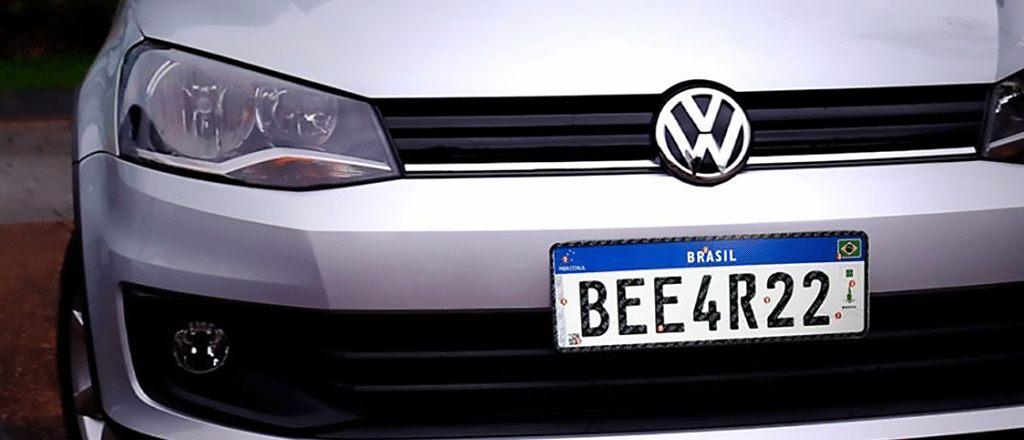

In [2]:
image = cv2.imread("/content/placa-mercosul.png")
cv2_imshow(image)


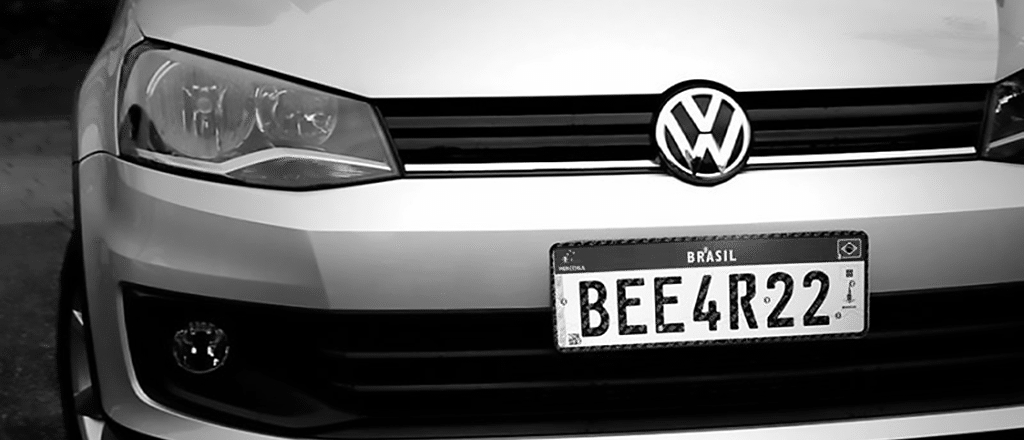

In [3]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

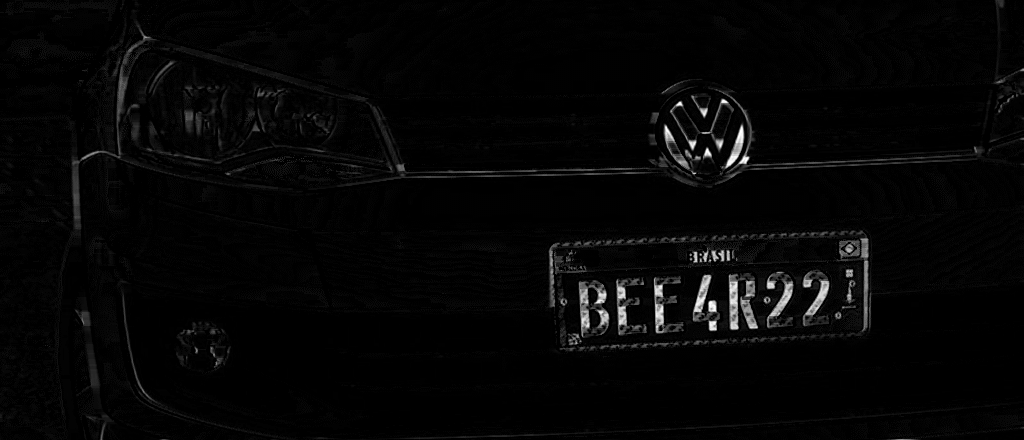

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,3))
black_hat = cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT, kernel)

cv2_imshow(black_hat)

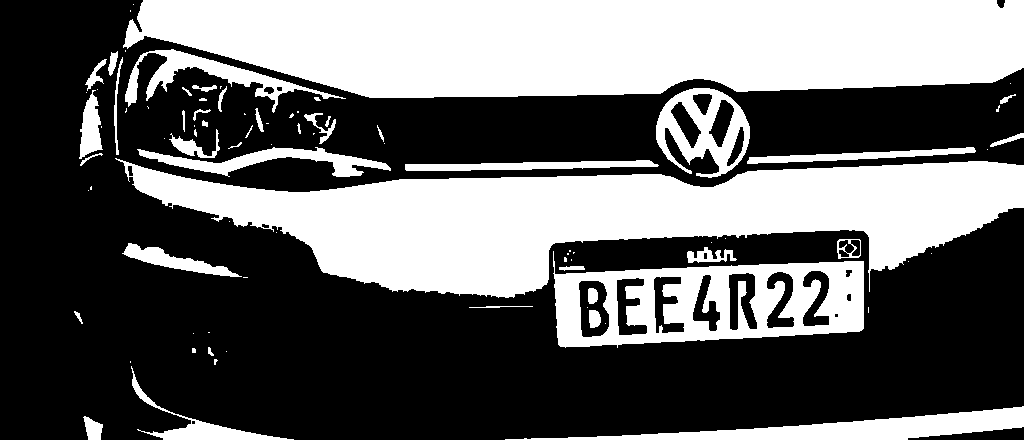

In [6]:
kernel2=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
luz = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel2)
luz=cv2.threshold(luz,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

cv2_imshow(luz)

In [8]:
gradient_x = cv2.Sobel(black_hat, ddepth=cv2.CV_32F, dx=1,dy=0,ksize=-1)
gradient_x = np.absolute(gradient_x)

In [11]:
(min, max) = (np.min(gradient_x),np.max(gradient_x))
gradient_x = 255*(gradient_x-min)/(max-min)

In [14]:
print(np.min(gradient_x))
print(np.max(gradient_x))

gradient_x=gradient_x.astype("uint8")

0.0
255.0


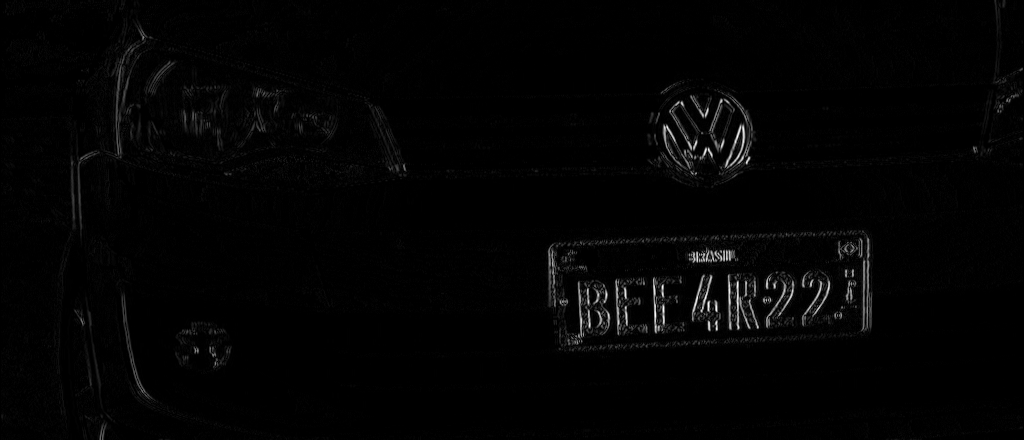

In [15]:
cv2_imshow(gradient_x)

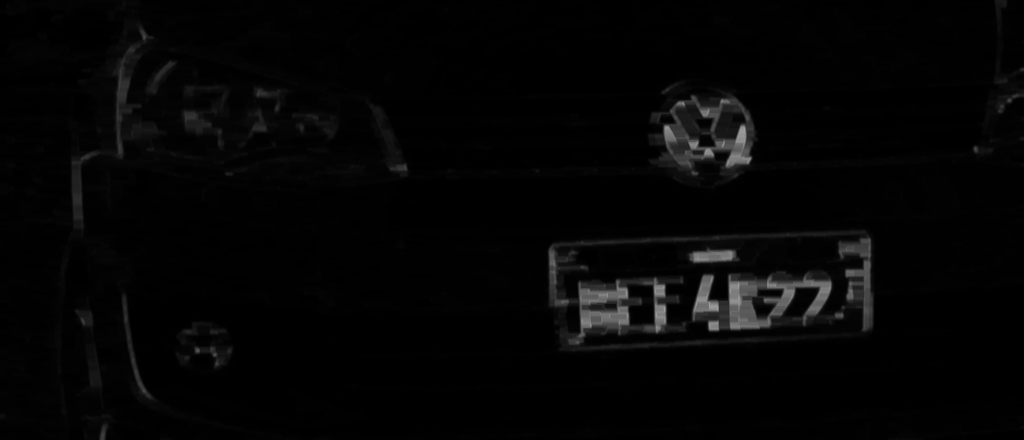

In [16]:
 gradient_x=cv2.GaussianBlur(gradient_x,(5,5),0)
 gradient_x=cv2.morphologyEx(gradient_x,cv2.MORPH_CLOSE,kernel)
 thres=cv2.threshold(gradient_x,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
 cv2_imshow(gradient_x)